In [701]:
import pandas as pd

# 데이터 준비
file_data = 'California Housing Prices.csv'
california_df = pd.read_csv(file_data)
california_df.head(), california_df.shape

(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income  median_house_value ocean_proximity  
 0       322.0       126.0         8.3252            452600.0        NEAR BAY  
 1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
 2       496.0       177.0         7.2574            352100.0        NEAR BAY  
 3       558.0       219.0         5.6431            341300.0        NEAR BAY  
 4       565.0       259.0         3.8462            342200.0        NEAR BAY  ,
 (20640, 10))

In [702]:
from sklearn.preprocessing import LabelEncoder

# object → int 
le_disaster = LabelEncoder()
california_df['ocean_proximity'] = le_disaster.fit_transform(california_df['ocean_proximity'])
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [703]:
# 결측치 처리
california_df.isnull().sum()
california_df = california_df.dropna()


In [704]:
# 중복 데이터 확인 및 제거
# california_df.duplicated().sum()
# california_df.drop_duplicates(inplace=True)

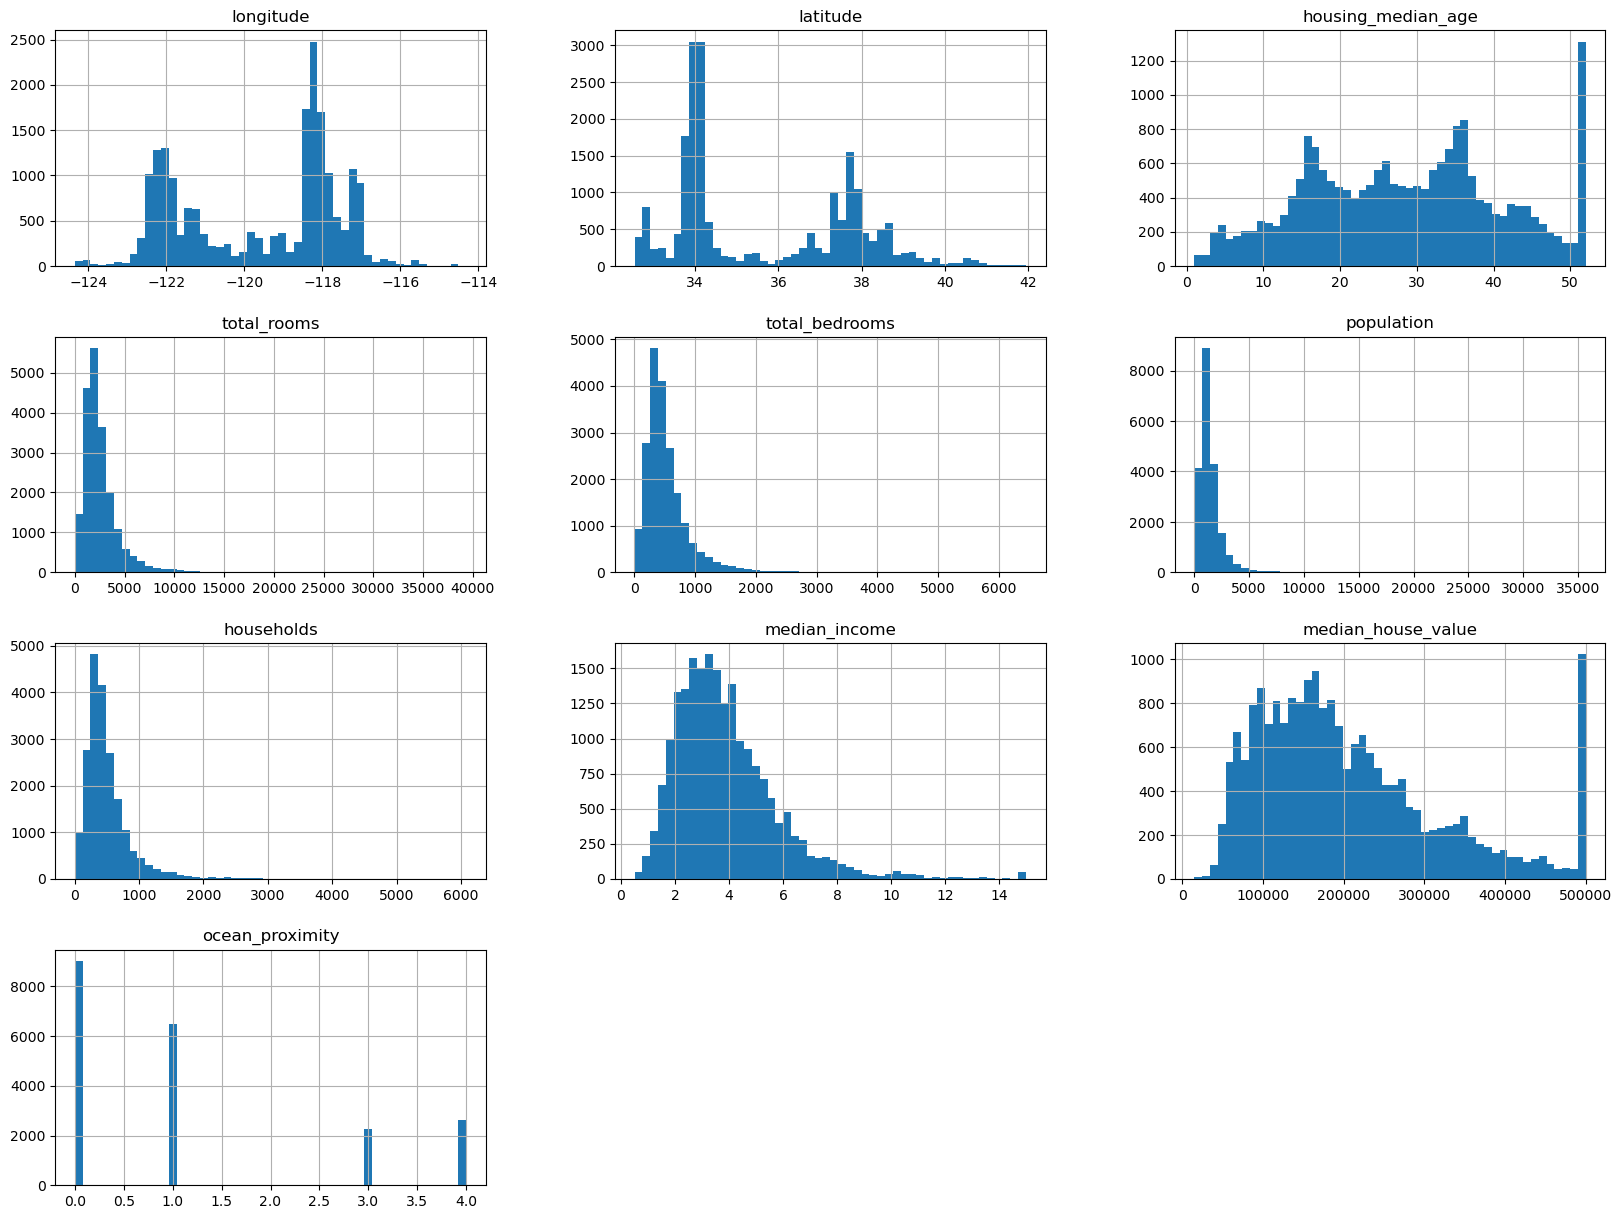

In [705]:
import seaborn as sns
import matplotlib.pyplot as plt
california_df.hist(bins=50, figsize=(20,15))
plt.show()

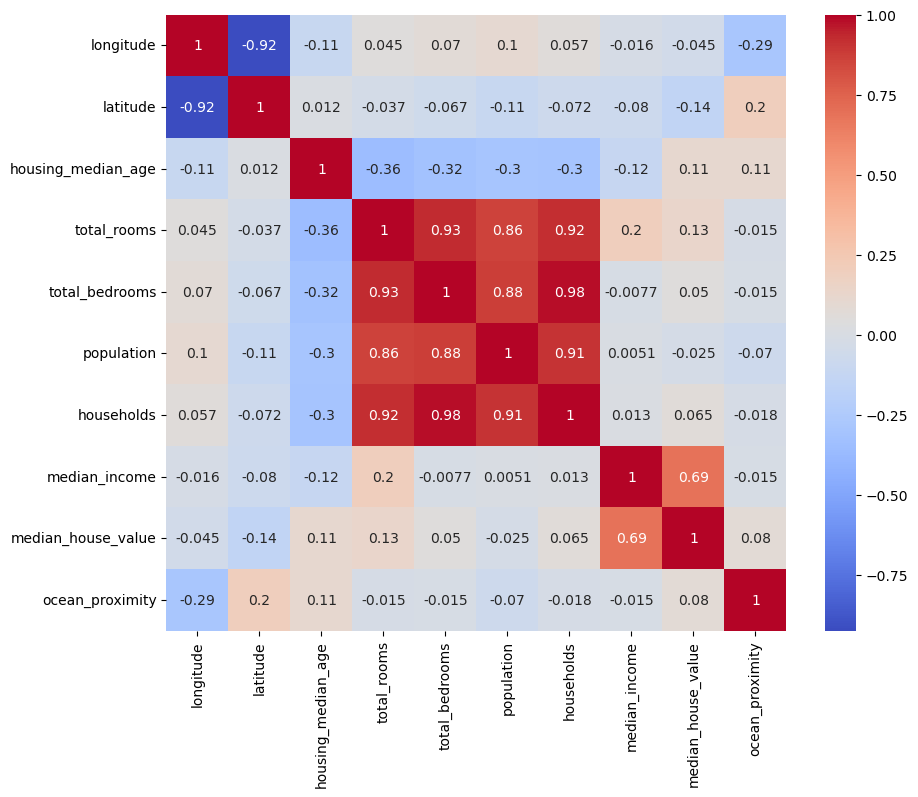

In [706]:
# 상관관계
corr_mat = california_df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm')
plt.show()

<Axes: >

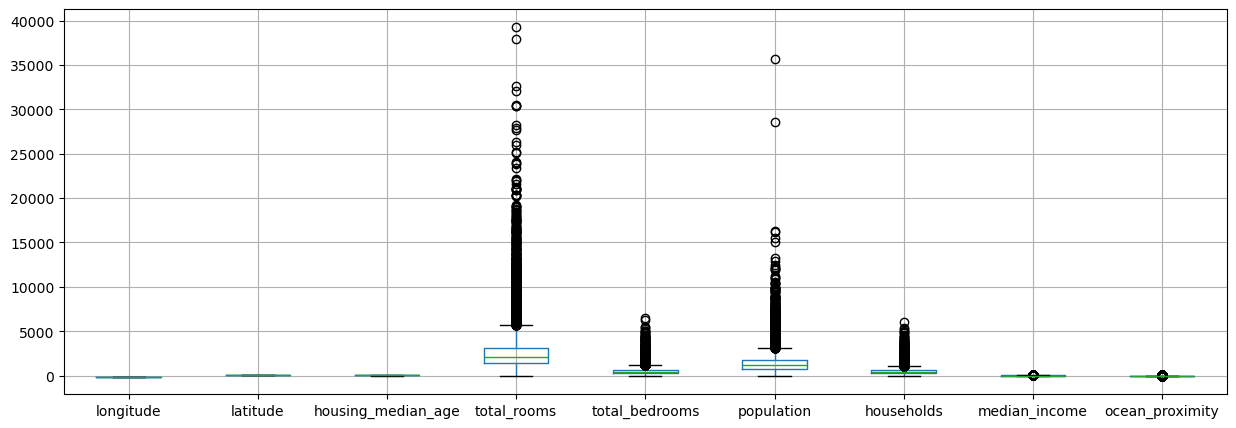

In [707]:
california_df.drop('median_house_value', axis=1).boxplot(figsize=(15,5)) # 이상치 확인

In [708]:
california_df = california_df[california_df['population'] <= 25000]

In [709]:
encoded_df = pd.get_dummies(california_df, columns=['ocean_proximity'])
encoded_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_0,ocean_proximity_1,ocean_proximity_2,ocean_proximity_3,ocean_proximity_4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [710]:
# 왜도 확인
# california_df.skew()

import numpy as np
california_df['total_rooms'] = np.log1p(california_df['total_rooms'])
california_df['total_bedrooms'] = np.log1p(california_df['total_bedrooms'])
california_df['population'] = np.log1p(california_df['population'])
california_df['households'] = np.log1p(california_df['households'])
california_df.skew()

longitude            -0.296177
latitude              0.464925
housing_median_age    0.061452
total_rooms          -1.086391
total_bedrooms       -0.997944
population           -1.059084
households           -1.062255
median_income         1.644436
median_house_value    0.978142
ocean_proximity       1.015923
dtype: float64

In [711]:
from sklearn.model_selection import train_test_split

X = encoded_df.drop(columns=['median_house_value'])
# X = encoded_df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = encoded_df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [712]:
# 데이터 스케일링
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [713]:
# 모델 훈련
# # from sklearn.linear_model import LassoCV
# # model = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
# model.fit(X_train_scaled, y_train)
# # model.alpha_

# from sklearn.linear_model import Lasso
# model = Lasso(alpha=1)

# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

# from sklearn.linear_model import Ridge
# model = Ridge(alpha=1.0)

from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()

# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_estimators=150)

# from sklearn.ensemble import GradientBoostingRegressor
# model = GradientBoostingRegressor()

# from sklearn.neural_network import MLPRegressor
# model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000)

model.fit(X_train_scaled, y_train)

pred = model.predict(X_test_scaled)

In [714]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

y_pred = (pred + xgb_pred) / 2

In [715]:
# 훈련 정확도
train_acc = model.score(X_train_scaled, y_train)
train_acc

0.6403647932813612

In [716]:
# 테스트 정확도
test_acc = model.score(X_test_scaled, y_test)
test_acc

0.6370726088685803

In [717]:
from sklearn.metrics import mean_squared_error
# MSE
mse = mean_squared_error(y_test, y_pred)
mse

2950937949.087296

In [718]:
from sklearn.metrics import r2_score
# r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7802371624275888